In [3]:
# importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Import dataframe

path = r'/Users/queency_yustiawan/Study/CF/data analyst course/immersion/A4 exercise/Instacart Basket Analysis'

df_ords_prods_merge = pd.read_pickle (os.path.join (path, '02 Data', 'Prepared Data', 'orders_products_merge_aggregated.pkl'))

In [4]:
# Check output

df_ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,order_interval_days,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_avg,spending_flag,order_frequency,frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequenct customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Slowest days,Average orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequenct customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Mid-range product,Regularly busy,Slowest days,Most orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequenct customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Mid-range product,Least busy,Slowest days,Average orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequenct customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Mid-range product,Least busy,Slowest days,Most orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequenct customer


### Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

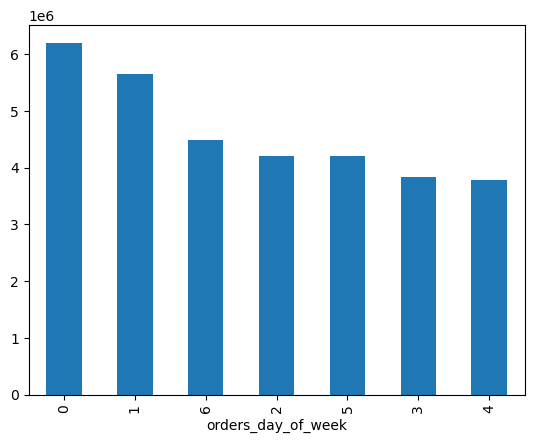

In [7]:
# Create Bar Charts for 'orders_day_of_week'

df_ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

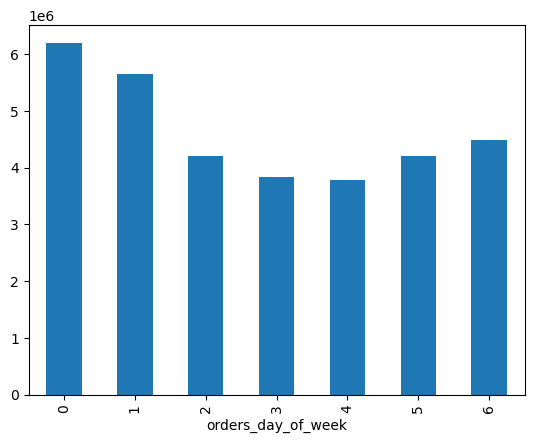

In [9]:
# Changing the bars order

bar = df_ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

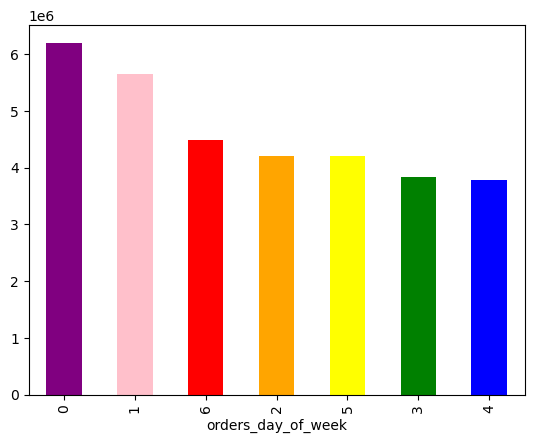

In [12]:
# Colouring the bars

bar = df_ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['purple','pink','red','orange','yellow','green','blue'])

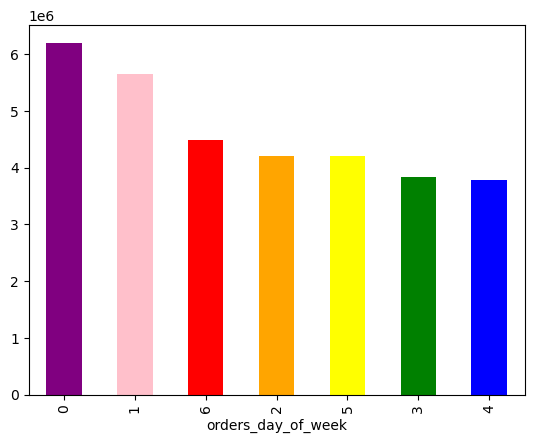

In [13]:
bar.figure

In [14]:
# Exporting the chart

bar.figure.savefig (os.path.join(path, '04 Analysis', 'Visualisations', 'bar_orders_dow.png'))

### Creating Histogram & Scatterplot

<Axes: ylabel='Frequency'>

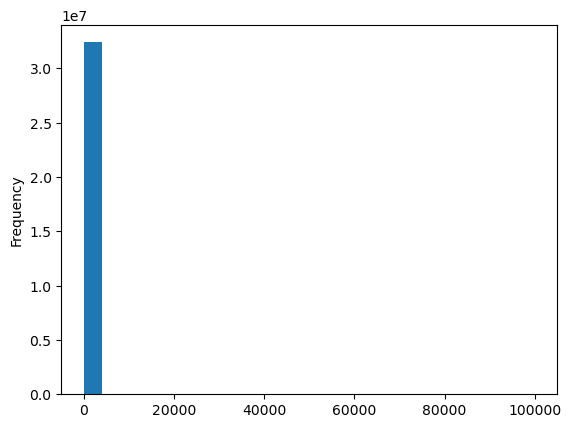

In [15]:
# Create histogram for 'prices' column

df_ords_prods_merge['prices'].plot.hist(bins = 25)

In [17]:
# Checking data

df_ords_prods_merge['prices'].describe( )

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [18]:
df_ords_prods_merge['prices'].median()

7.4

<Axes: xlabel='prices', ylabel='prices'>

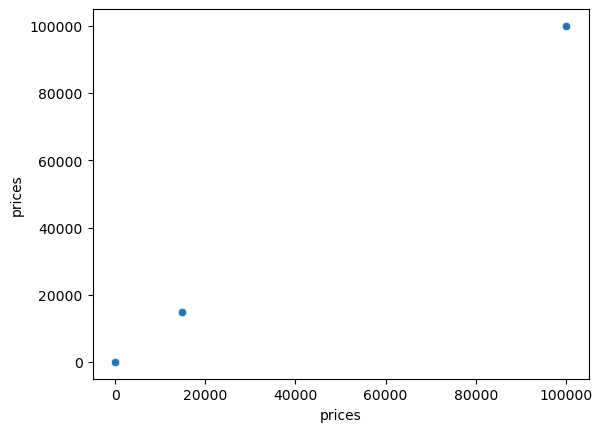

In [20]:
# Create scatterplot for 'prices' column to check the outlier

sns.scatterplot(x = 'prices', y = 'prices', data = df_ords_prods_merge)

In [21]:
# Checking data prices that is above $100

df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,order_interval_days,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_avg,spending_flag,order_frequency,frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular Customer,108.648299,High Spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular Customer,108.648299,High Spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New Customer,1154.792308,High Spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Busiest day,Busiest days,Average orders,4,New Customer,1154.792308,High Spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular Customer,114.426619,High Spender,23.0,Non-frequenct customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular Customer,1106.743956,High Spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular Customer,1106.743956,High Spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Slowest days,Most orders,15,Regular Customer,451.153540,High Spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Slowest days,Average orders,12,Regular Customer,1178.381871,High Spender,12.0,Regular customer


In [22]:
# Marking the outlier as NaNs / missing data

df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 100, 'prices'] = np.nan

In [24]:
# Checking max value after replacing the outlier value

df_ords_prods_merge['prices'].max ()

25.0

<Axes: ylabel='Frequency'>

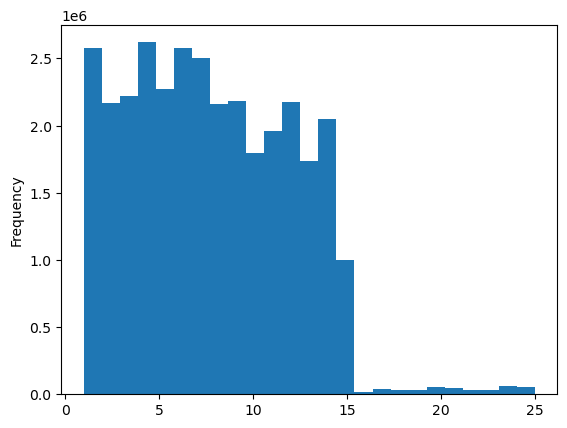

In [25]:
# Re-create the histogram

df_ords_prods_merge['prices'].plot.hist(bins=25)

<Axes: ylabel='Frequency'>

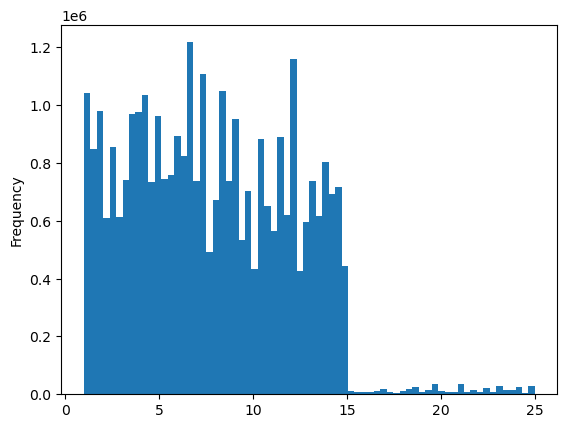

In [27]:
# Creating thinner bars in histograms

df_ords_prods_merge['prices'].plot.hist(bins = 70)

In [6]:
# Create random float numbers

np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_merge)) <= 0.7

In [8]:
# Split dataframe into two samples

big = df_ords_prods_merge[dev]
small = df_ords_prods_merge[~dev]

In [9]:
# compare dataframe length

len(df_ords_prods_merge)

32404859

In [10]:
len(big) + len(small)

32404859

In [11]:
# Create Line Chart for small samples

df_2 = small[['orders_day_of_week','prices']]

/Users/queency_yustiawan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/queency_yustiawan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


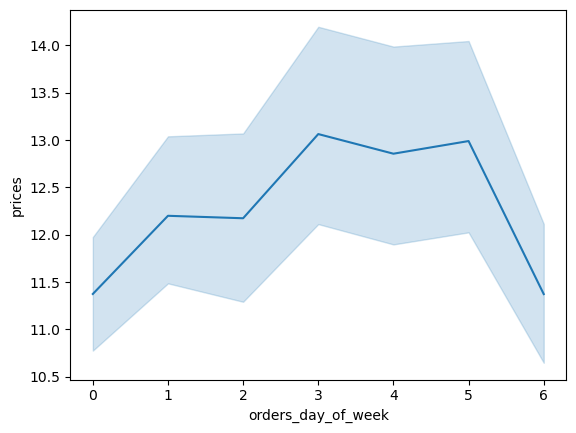

In [12]:
line = sns.lineplot (data = df_2, x = 'orders_day_of_week', y = 'prices')

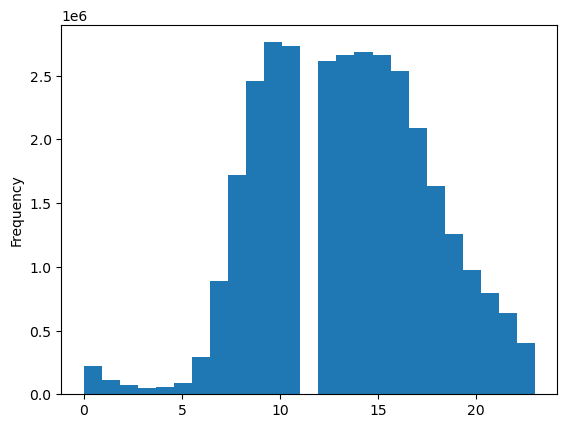

In [13]:
hist2 = df_ords_prods_merge['order_hour_of_day'].plot.hist(bins=25)